In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
grid_data = pd.read_csv('grid_stability_5years.csv')
grid_data.head()

,date,c1,c2,c3,p1,p2,p3,stability
0,01-01-2019 01:00,-0.782604,-1.257395,-1.723086,0.859578,0.887445,0.958034,unstable
1,01-01-2019 02:00,-1.940058,-1.872742,-1.255012,0.862414,0.562139,0.781760,stable
2,01-01-2019 03:00,-1.207456,-1.277210,-0.920492,0.766689,0.839444,0.109853,unstable
3,01-01-2019 04:00,-1.027473,-1.938944,-0.997374,0.976744,0.929381,0.362718,unstable
4,01-01-2019 05:00,-1.125531,-1.845975,-0.554305,0.455450,0.656947,0.820923,unstable


In [4]:
grid_data.shape

(43823, 8)

In [5]:
grid_data.columns

Index(['date', 'c1', 'c2', 'c3', 'p1', 'p2', 'p3', 'stability'], dtype='object')

In [13]:
grid_data.isnull().sum


<bound method DataFrame.sum of         date     c1     c2     c3     p1     p2     p3  stability
0      False  False  False  False  False  False  False      False
1      False  False  False  False  False  False  False      False
2      False  False  False  False  False  False  False      False
3      False  False  False  False  False  False  False      False
4      False  False  False  False  False  False  False      False
...      ...    ...    ...    ...    ...    ...    ...        ...
43818  False  False  False  False  False  False  False      False
43819  False  False  False  False  False  False  False      False
43820  False  False  False  False  False  False  False      False
43821  False  False  False  False  False  False  False      False
43822  False  False  False  False  False  False  False      False

[43823 rows x 8 columns]>

In [6]:
grid_data[grid_data.duplicated()]

,date,c1,c2,c3,p1,p2,p3,stability


In [15]:
grid_data = grid_data.drop_duplicates(keep="first")

In [16]:
grid_data.isnull().sum()


date         0
c1           0
c2           0
c3           0
p1           0
p2           0
p3           0
stability    0
dtype: int64

In [17]:
grid_data.dropna(how='any', inplace=True)

In [21]:
grid_data.describe()

,c1,c2,c3,p1,p2,p3
count,43823.000000,43823.000000,43823.000000,43823.000000,43823.000000,43823.000000
mean,-1.250546,-1.249507,-1.249552,0.524386,0.525091,0.524850
std,0.432717,0.433164,0.432663,0.274152,0.274024,0.274112
min,-1.999945,-1.999945,-1.999945,0.050028,0.050028,0.050028
25%,-1.624822,-1.625254,-1.624678,0.287146,0.288137,0.287527
50%,-1.250468,-1.249347,-1.248716,0.523687,0.524937,0.524818
75%,-0.876309,-0.873360,-0.875252,0.761357,0.762186,0.762276
max,-0.500025,-0.500025,-0.500025,0.999982,0.999982,0.999982


In [20]:
corr = grid_data[['c1', 'c2', 'c3', 'p1', 'p2', 'p3']].corr()
corr

,c1,c2,c3,p1,p2,p3
c1,1.000000,0.000602,0.001196,-0.005129,0.005303,0.004277
c2,0.000602,1.000000,0.005944,0.000980,0.003134,-0.002371
c3,0.001196,0.005944,1.000000,-0.002305,-0.001388,-0.004480
p1,-0.005129,0.000980,-0.002305,1.000000,-0.006812,-0.009516
p2,0.005303,0.003134,-0.001388,-0.006812,1.000000,-0.003721
p3,0.004277,-0.002371,-0.004480,-0.009516,-0.003721,1.000000


<Axes: >

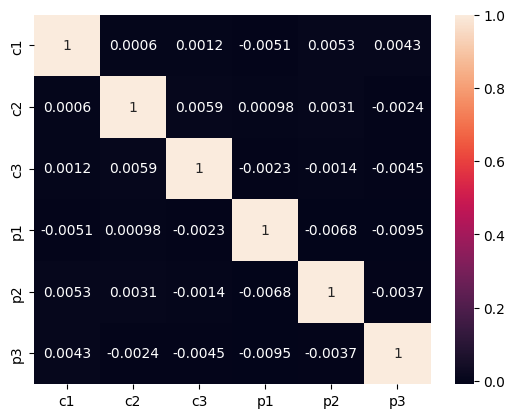

In [22]:
sns.heatmap(corr, annot=True)

#### Feature Engineering:

In [24]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [25]:
grid_data['stability_encode'] = Label_Encoder.fit_transform(grid_data['stability'])

In [26]:
grid_data.head()

,date,c1,c2,c3,p1,p2,p3,stability,stability_encode
0,01-01-2019 01:00,-0.782604,-1.257395,-1.723086,0.859578,0.887445,0.958034,unstable,1
1,01-01-2019 02:00,-1.940058,-1.872742,-1.255012,0.862414,0.562139,0.781760,stable,0
2,01-01-2019 03:00,-1.207456,-1.277210,-0.920492,0.766689,0.839444,0.109853,unstable,1
3,01-01-2019 04:00,-1.027473,-1.938944,-0.997374,0.976744,0.929381,0.362718,unstable,1
4,01-01-2019 05:00,-1.125531,-1.845975,-0.554305,0.455450,0.656947,0.820923,unstable,1


#### Feature Scaling


In [27]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [29]:
grid_data['c1_scaled']=std_scaler.fit_transform(grid_data[['c1']])

In [30]:
grid_data['c2_scaled']=std_scaler.fit_transform(grid_data[['c2']])

In [31]:
grid_data['c3_scaled']=std_scaler.fit_transform(grid_data[['c3']])

In [32]:
grid_data['p1_scaled']=std_scaler.fit_transform(grid_data[['p1']])

In [33]:
grid_data['p2_scaled']=std_scaler.fit_transform(grid_data[['p2']])

In [34]:
grid_data['p3_scaled']=std_scaler.fit_transform(grid_data[['p3']])

In [35]:
grid_data.head()

,date,c1,c2,c3,p1,p2,p3,stability,stability_encode,c1_scaled,c2_scaled,c3_scaled,p1_scaled,p2_scaled,p3_scaled
0,01-01-2019 01:00,-0.782604,-1.257395,-1.723086,0.859578,0.887445,0.958034,unstable,1,1.081419,-0.018211,-1.094476,1.222662,1.322361,1.580336
1,01-01-2019 02:00,-1.940058,-1.872742,-1.255012,0.862414,0.562139,0.781760,stable,0,-1.593468,-1.438812,-0.012619,1.233007,0.135203,0.937256
2,01-01-2019 03:00,-1.207456,-1.277210,-0.920492,0.766689,0.839444,0.109853,unstable,1,0.099583,-0.063957,0.760554,0.883834,1.147188,-1.513985
3,01-01-2019 04:00,-1.027473,-1.938944,-0.997374,0.976744,0.929381,0.362718,unstable,1,0.515523,-1.591649,0.582859,1.650043,1.475399,-0.591488
4,01-01-2019 05:00,-1.125531,-1.845975,-0.554305,0.455450,0.656947,0.820923,unstable,1,0.288911,-1.377018,1.606921,-0.251455,0.481190,1.080132
